In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta
import tensorflow as tf
import keras
from keras.layers import Input
from tensorflow.python.framework import ops
import math

C:\Users\gandh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train1 = np.loadtxt('X_train1.txt', dtype=float)
X_train2 = np.loadtxt('X_train2.txt', dtype=float)
X_val1 = np.loadtxt('X_val1.txt', dtype=float)
X_val2 = np.loadtxt('X_val2.txt', dtype=float)
X_test1 = np.loadtxt('X_test1.txt', dtype=float)
X_test2 = np.loadtxt('X_test2.txt', dtype=float)
y_train = np.loadtxt("y_train.txt", dtype=float)
y_val = np.loadtxt("y_val.txt", dtype=float)
y_test = np.loadtxt("y_test.txt", dtype=float)

In [3]:
X_train1.T.shape, y_train[np.newaxis].shape

((168, 5103), (1, 5103))

In [4]:
y_train/=1000#np.max(y_train)
y_test/=1000#np.max(y_test)
y_val/=1000#np.max(y_val)
# X_train = np.concatenate((X_train1, X_train2), axis=1)
# X_val = np.concatenate((X_val1, X_val2), axis=1)

# X_train = X_train.T
# X_val = X_val.T

# y_train=y_train[np.newaxis]
# y_val=y_val[np.newaxis]

# X_train.shape, X_val.shape, y_train.shape, y_val.shape


In [5]:
X_input = Input([X_train1.shape[1],1])
X_input_2 = Input([X_train2.shape[1],1])

def create_model(X_input, X_input_2):
    
    X1 = keras.layers.Conv1D(kernel_size=(3), filters=64, activation='relu', name='Conv_1')(X_input)
    X1 = keras.layers.MaxPooling1D(pool_size=2, name ='Pool_1')(X1)
    X2 = keras.layers.Conv1D(kernel_size=(5), filters=64, activation='relu', name='Conv_2')(X_input)
    X2 = keras.layers.MaxPooling1D(pool_size=2, name='Pool_2')(X2)
    X3 = keras.layers.Conv1D(kernel_size=(7), filters=64, activation='relu', name='Conv_3')(X_input)
    X3 = keras.layers.MaxPooling1D(pool_size=2, name='Pool_3')(X3)
    X4 = keras.layers.Concatenate(axis=1, name='Concat_1')([X1,X2,X3])
    X5 = keras.layers.LSTM(32, return_sequences=True, name='LSTM_1')(X4)
    X6 = keras.layers.GlobalAveragePooling1D(name='Mean_1')(X5)
    X7 = keras.layers.Flatten()(X_input_2)
    X7 = keras.layers.Dense(32, name='Dense_1')(X7)
    X8 = keras.layers.Concatenate(axis=1, name='Concat_2')([X6,X7])
    X9 = keras.layers.Dense(16, name='Dense_2')(X8)
    Pred = keras.layers.Dense(1, name='Dense_3')(X9)
    
    model = keras.models.Model(inputs=[X_input, X_input_2], outputs=Pred, name='C-RNN')

    return model

In [6]:
model = create_model(X_input, X_input_2)

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 168, 1)       0                                            
__________________________________________________________________________________________________
Conv_1 (Conv1D)                 (None, 166, 64)      256         input_1[0][0]                    
__________________________________________________________________________________________________
Conv_2 (Conv1D)                 (None, 164, 64)      384         input_1[0][0]                    
__________________________________________________________________________________________________
Conv_3 (Conv1D)                 (None, 162, 64)      512         input_1[0][0]                    
__________________________________________________________________________________________________
Pool_1 (Ma

In [9]:
from keras.utils import plot_model
plot_model(model)

ImportError: Failed to import `pydot`. Please install `pydot`. For example with `pip install pydot`.

In [13]:
from keras import optimizers
adam = optimizers.Adam(lr=0.001)
model.compile(optimizer=adam, loss='mse', metrics=['acc'])

# X_train1 = tf.cast(tf.reshape(tf.convert_to_tensor(X_train1), [X_train1.shape[0], X_train1.shape[1],1]), tf.float32)
# X_train2 = tf.cast(tf.reshape(tf.convert_to_tensor(X_train2), [X_train2.shape[0], X_train2.shape[1],]), tf.float32)
X_train1 = np.reshape(X_train1,[X_train1.shape[0], X_train1.shape[1],1])
X_train2 = np.reshape(X_train2,[X_train2.shape[0], X_train2.shape[1],1])
X_val1 = np.reshape(X_val1,[X_val1.shape[0], X_val1.shape[1],1])
X_val2 = np.reshape(X_val2,[X_val2.shape[0], X_val2.shape[1],1])

# X_val1 = tf.cast(tf.reshape(tf.convert_to_tensor(X_val1), [X_val1.shape[0], X_val1.shape[1],1]), tf.float32)
# X_val2 = tf.cast(tf.reshape(tf.convert_to_tensor(X_val2), [X_val2.shape[0], X_val2.shape[1],]), tf.float32)
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3)
model.fit([X_train1, X_train2], y_train, epochs=20, validation_data=([X_val1, X_val2], y_val), callbacks=[early_stopping_monitor])

Train on 5103 samples, validate on 1458 samples
Epoch 1/20
5103/5103 [==============================] - 28s 6ms/step - loss: 1.0463 - acc: 0.0000e+00 - val_loss: 0.7294 - val_acc: 0.0000e+00
Epoch 2/20
5103/5103 [==============================] - 36s 7ms/step - loss: 0.7140 - acc: 0.0000e+00 - val_loss: 0.6585 - val_acc: 0.0000e+00
Epoch 3/20
5103/5103 [==============================] - 43s 8ms/step - loss: 0.6392 - acc: 0.0000e+00 - val_loss: 0.7292 - val_acc: 0.0000e+00
Epoch 4/20
5103/5103 [==============================] - 31s 6ms/step - loss: 1.1292 - acc: 0.0000e+00 - val_loss: 0.8242 - val_acc: 0.0000e+00
Epoch 5/20
5103/5103 [==============================] - 28s 5ms/step - loss: 0.6301 - acc: 0.0000e+00 - val_loss: 0.6141 - val_acc: 0.0000e+00
Epoch 6/20
5103/5103 [==============================] - 28s 6ms/step - loss: 0.6003 - acc: 0.0000e+00 - val_loss: 0.6819 - val_acc: 0.0000e+00
Epoch 7/20
5103/5103 [==============================] - 32s 6ms/step - loss: 0.6171 - acc: 0.0

In [14]:
try:
    from tensorflow.python.keras.models import load_model

    model.save('model.h5')

    
    new_model = load_model('model.h5')
except:
    pass

X_test1 = np.reshape(X_test1,[X_test1.shape[0], X_test1.shape[1],1])
X_test2 = np.reshape(X_test2,[X_test2.shape[0], X_test2.shape[1],1])

# X_test1 = tf.cast(tf.reshape(tf.convert_to_tensor(X_test1), [X_test1.shape[0], X_test1.shape[1],1]), tf.float32)
# X_test2 = tf.cast(tf.reshape(tf.convert_to_tensor(X_test2), [X_test2.shape[0], X_test2.shape[1],]), tf.float32)

In [21]:
score_train = model.evaluate([X_train1, X_train2], y_train)
print('MSE:', score_train[0])

score_val = model.evaluate([X_val1, X_val2], y_val)
print('MSE:', score_val[0])

score_test = model.evaluate([X_test1, X_test2], y_test)
print('MSE:', score_test[0])

5103/5103 [==============================] - 6s 1ms/step
MSE: 0.4798101331413014
1458/1458 [==============================] - 2s 1ms/step
MSE: 0.5208419610443429
730/730 [==============================] - 1s 1ms/step
MSE: 0.6139318593560833


In [20]:
pred_test = model.predict([X_test1, X_test2])
pred_train = model.predict([X_train1, X_train2])
pred_val = model.predict([X_val1, X_val2])
# pred[0], y_test[0]

(array([8.751912], dtype=float32), 9.136793308333335)

In [25]:
len(pred), len(X_test2)

def calc_r_2(pred, y_test):
    mse=0
    for i in range(len(pred)):
        mse+=(pred[i]-y_test[i])**2
    mse/=len(pred)
    # X_test1.shape
    # pred[729], y_test[729]
    mse = mse[0]
    var_y = np.var(y_test)
    return (1-(mse/var_y))

print('train:', calc_r_2(pred_train, y_train))
print('val:', calc_r_2(pred_val, y_val))
print('test:', calc_r_2(pred_test, y_test))

train: 0.8279775810233087
val: 0.817754995327652
test: 0.7774640640364986


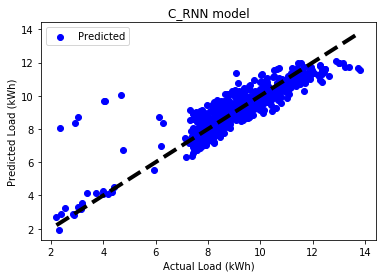

In [26]:
def plot(x,y,x_label=None,y_label=None, title=None, style1=None, color1=None, label1=None, y2=None, label2=None, \
           style2=None, color2=None):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plot1 = plt.scatter(x, y, color=color1)
    plot2, = plt.plot([(y_test).min(), (y_test).max()], [(y_test).min(), (y_test).max()], 'k--', lw=4)
    plt.legend([plot1], [label1, label2])
    plt.show()
    
plot(y_test, pred_test, 'Actual Load (kWh)', 'Predicted Load (kWh)',  'C_RNN model', \
       style1='.', color1='blue', label1='Predicted', y2=y_test, label2='Actual', \
       style2='--', color2='black')
